<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Signals_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/dma.csv')

In [3]:
data.tail(2)

,Unnamed: 0,Date,dma_ml,rf_ta,hmm,ff_ta,impulse,ta_50,kalman_filter,Close
412,412,27-10-2021,-1,1,1,-1,0,1,1,18210.94922
413,413,28-10-2021,-1,1,1,-1,-1,1,1,17857.25000


In [4]:
data=data.set_index('Date')

In [5]:
del data['Unnamed: 0']

In [6]:
data['total']=data['dma_ml']+data['rf_ta']+data['hmm']+data['ff_ta']+data['impulse']+\
              data['ta_50']+data['kalman_filter']

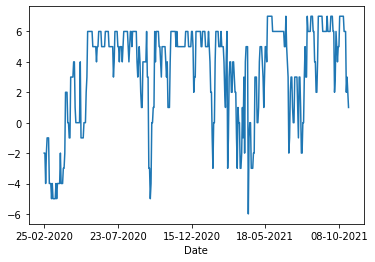

In [7]:
data['total'].plot();

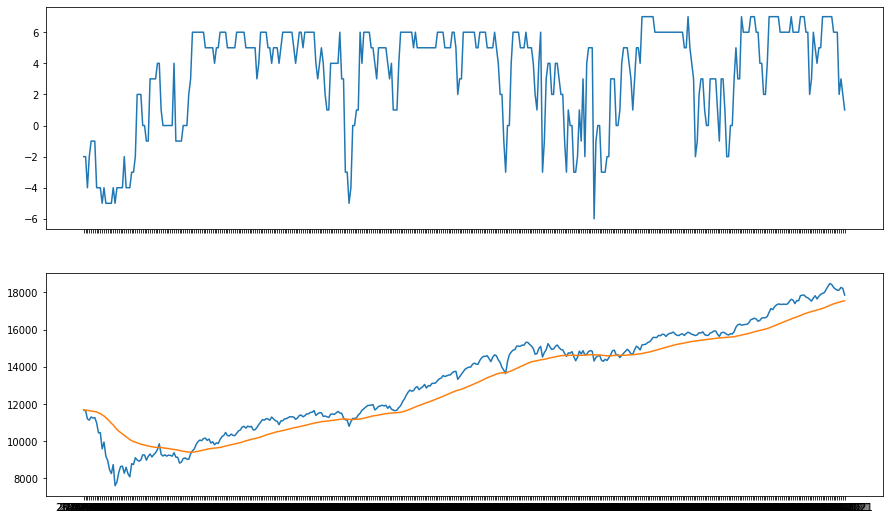

In [12]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(data.loc[:, :].index, data.loc[:, 'total'], label='Signals')
ax[1].plot(data.loc[:, :].index, data.loc[:, 'Close'], label='Nifty')
#ax[2].scatter(nifty.iloc[buy].index,nifty.iloc[buy].Close,marker='^',label='Buy',color='g')
#ax[2].scatter(nifty.iloc[sell].index,nifty.iloc[sell].Close,marker='v',label='Sell',color='r')
ax[1].plot(data['Close'].ewm(span=50,adjust=False).mean())
